In [156]:
import json
import math
import numpy as np
import sys
import os
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

from libs.entropy_coding import slq
from libs.entropy_coding import vlq
from libs.data_transformation import delta_encoding
from libs.data_transformation import basicPredictive
from libs.data_transformation import predictive_coding
from libs.data_transformation import split_data
from libs.entropy_coding import r_golomb

data_file = zipfile.ZipFile('./data/data.zip', 'r')
data = json.load(data_file.open('1661426400[0]-ant121-skifiloc-ang170-iq.json', 'r'))

data_i = np.array(data['i'])
data_q = np.array(data['q'])
data_ant = np.array(data['ant'])



In [91]:
def print_stats(arr, name):
    std_dev = round(np.std(arr), 2)
    min = np.min(arr)
    max = np.max(arr)
    
    print(f'Standard Deviation: {std_dev}')
    print(f'RANGE: [{min},{max}]')
    value,counts = np.unique(arr, return_counts=True)
    print(f'Entropy: {entropy(counts)}')

    slq_arr, data_i_bit_len = slq.encode(arr)
    vlq_arr = vlq.encode(arr)
    golomb = r_golomb.encode(arr, 8)

    print(f'16b_int: {len(slq_arr)} BITS')
    print(f'Variable length quantity: {len(vlq_arr) } BITS')
    print(f'Rice Golomb Coding: {len(golomb) } BITS')

    plt.rcParams["figure.figsize"] = (10,10)
    plt.hist(arr, 200, density=True, facecolor='blue', alpha=0.8)
    plt.grid(True)
    plt.title(f'HISTOGRAM ({name})')
    plt.xlabel('hodnota')
    plt.ylabel('incidencia hodnoty')
    plt.show()

In [92]:
def get_std_dev(arr):
    return round(np.std(arr), 2)

In [93]:
def get_entropy(arr):
    value,counts = np.unique(arr, return_counts=True)
    return entropy(counts)

In [94]:
def get_range(arr):
    min = np.min(arr)
    max = np.max(arr)
    
    return abs(min) + abs(max)

## Original data stats

Standard Deviation: 204.61
RANGE: [-390,386]
Entropy: 6.219559409759786
16b_int: 19968 BITS
Variable length quantity: 17512 BITS
Rice Golomb Coding: 57211 BITS


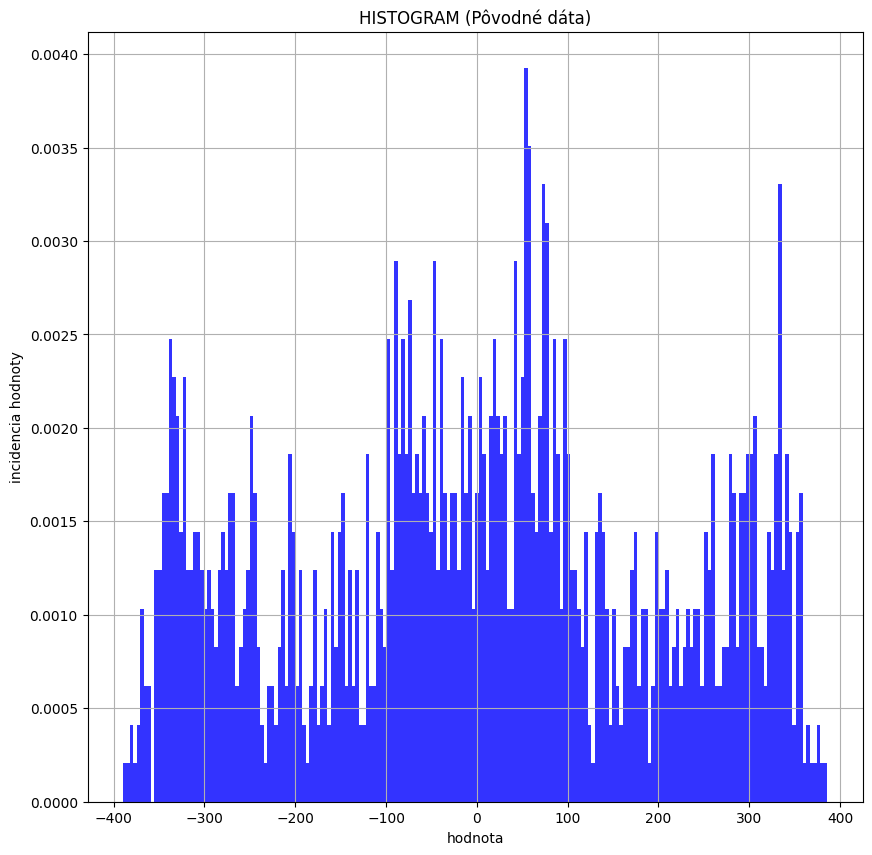

average std dev: 198.424
average entropy: 6.192616587877312
average range: 740.0


In [95]:
print_stats(np.append(data_i, data_q), 'Pôvodné dáta')

sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = np.append(data_i, data_q)

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}')    

# Delta encoding

Standard Deviation: 82.04
RANGE: [-169,173]
Entropy: 5.557529570612063
16b_int: 19968 BITS
Variable length quantity: 14992 BITS
Rice Golomb Coding: 25695 BITS


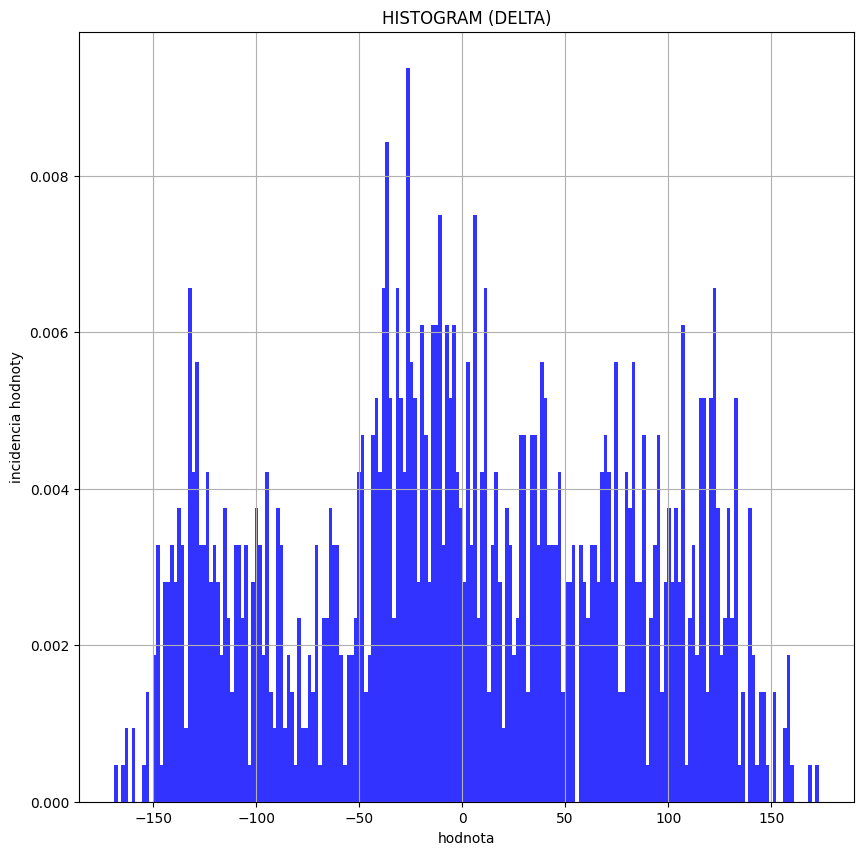

average std dev: 79.67999999999998
average entropy: 5.54188100463608
average range: 438.0


In [96]:
new_i = delta_encoding.encode(np.append(data_i, data_q))
print_stats(new_i, 'DELTA')

sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(np.append(data_i, data_q))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}')    

#Delta delta coding

Standard Deviation: 38.34
RANGE: [-164,295]
Entropy: 4.893009419002089
16b_int: 19968 BITS
Variable length quantity: 10504 BITS
Rice Golomb Coding: 14124 BITS


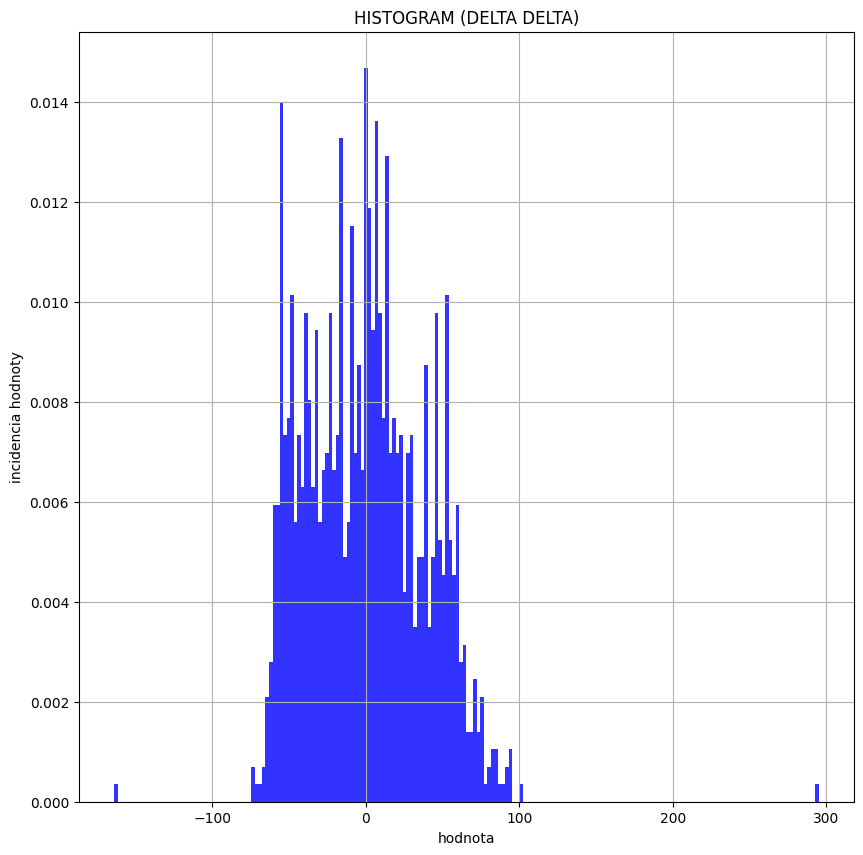

average std dev: 38.827999999999996
average entropy: 4.876662882742167
average range: 571.3


In [97]:
new_i = delta_encoding.encode(delta_encoding.encode(np.append(data_i, data_q)))
print_stats(new_i, 'DELTA DELTA')

sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(delta_encoding.encode(np.append(data_i, data_q)))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}') 

In [98]:
# pc_i, pc_q, predictor = predictive_coding.encode_one_sine_delta(data)


# _, data_sep = split_data.split_by_ant(data['i'], data['ant'])

# amp = predictor['amp']
# phase = predictor['phase']
# offset = predictor['offset']
# freq = predictor['freq']

# print_stats(pc_i, 'I')
# print_stats(delta_encoding.encode(pc_q), 'PREDICTION Q')

# time_axs = np.linspace(0, 156e-6, 625)

# signal = amp * np.sin(2*np.pi*freq*time_axs + phase)
# signal = amp * np.sin(2*np.pi*freq*time_axs + phase)

# plt.rcParams["figure.figsize"] = (50,10)
# plt.figure()


# plt.plot(data_sep['2'])

# plt.rcParams["figure.figsize"] = (50,10)
# plt.figure()


# plt.plot(data_i)
# plt.plot(signal)

# plt.figure()
# plt.plot(pc_i)
# #plt.plot(delta_encoding.encode(data_i))



249301.39856567868
Standard Deviation: 46.34
RANGE: [-111,145]
Entropy: 5.063168254466792
16b_int: 9984 BITS
Variable length quantity: 5880 BITS
Rice Golomb Coding: 8008 BITS


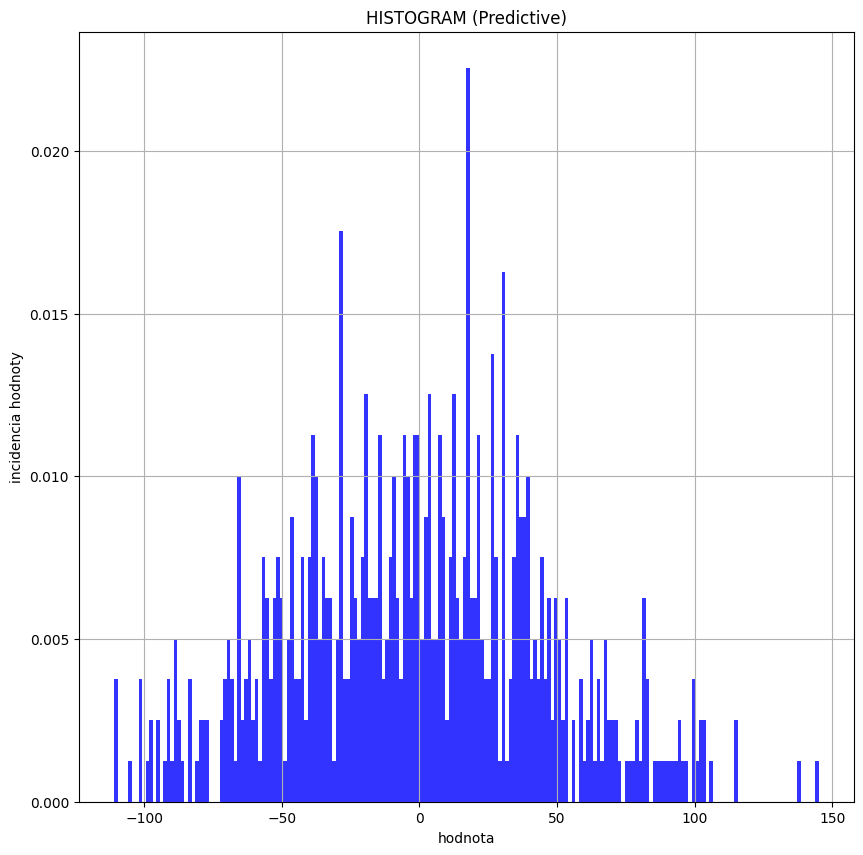

Standard Deviation: 23.64
RANGE: [-96,85]
Entropy: 4.439098622099758
16b_int: 9984 BITS
Variable length quantity: 5080 BITS
Rice Golomb Coding: 5039 BITS


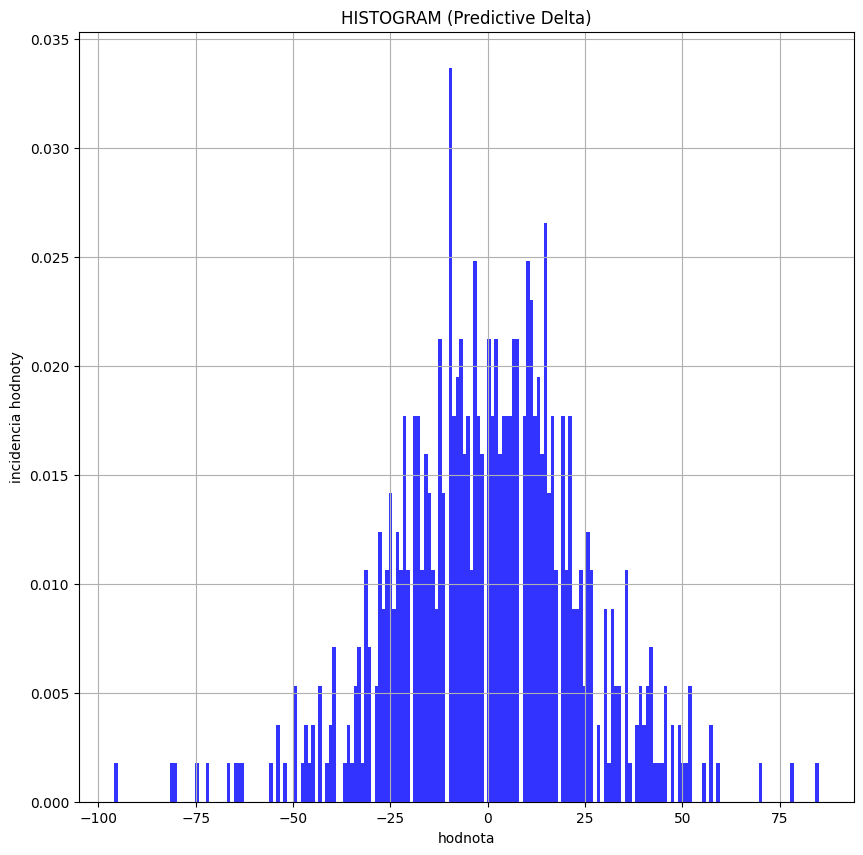

Standard Deviation: 21.45
RANGE: [-69,78]
Entropy: 4.30372591541463
16b_int: 9984 BITS
Variable length quantity: 5024 BITS
Rice Golomb Coding: 4743 BITS


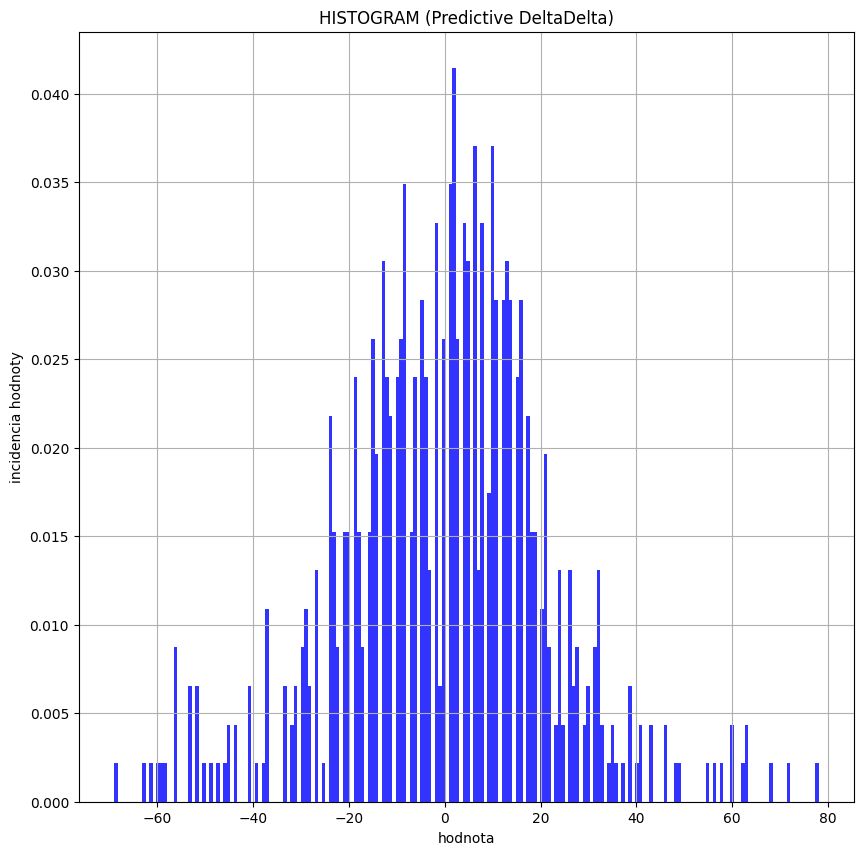

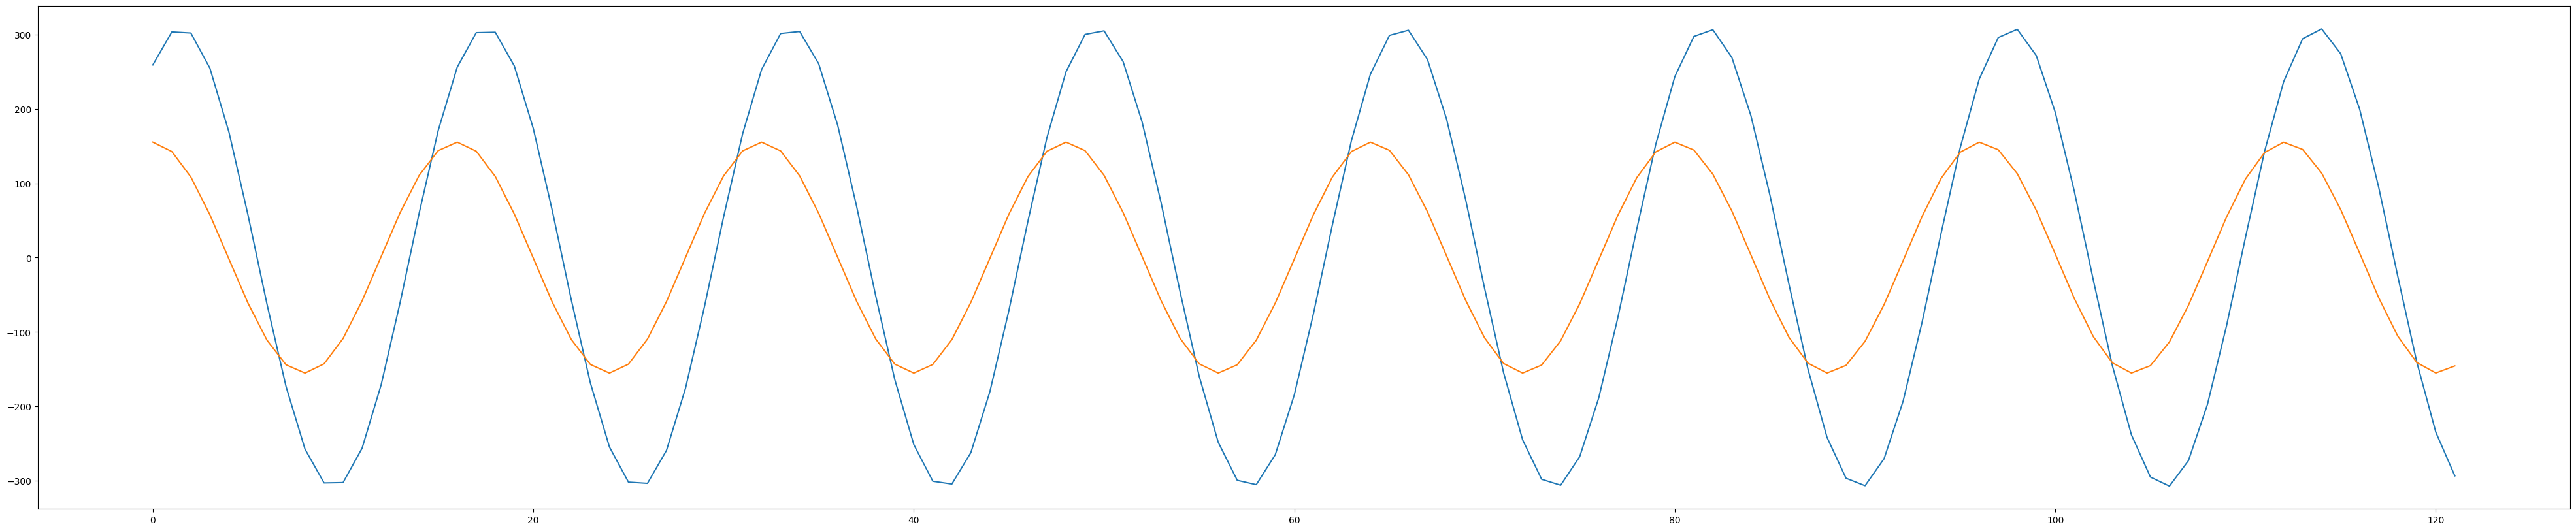

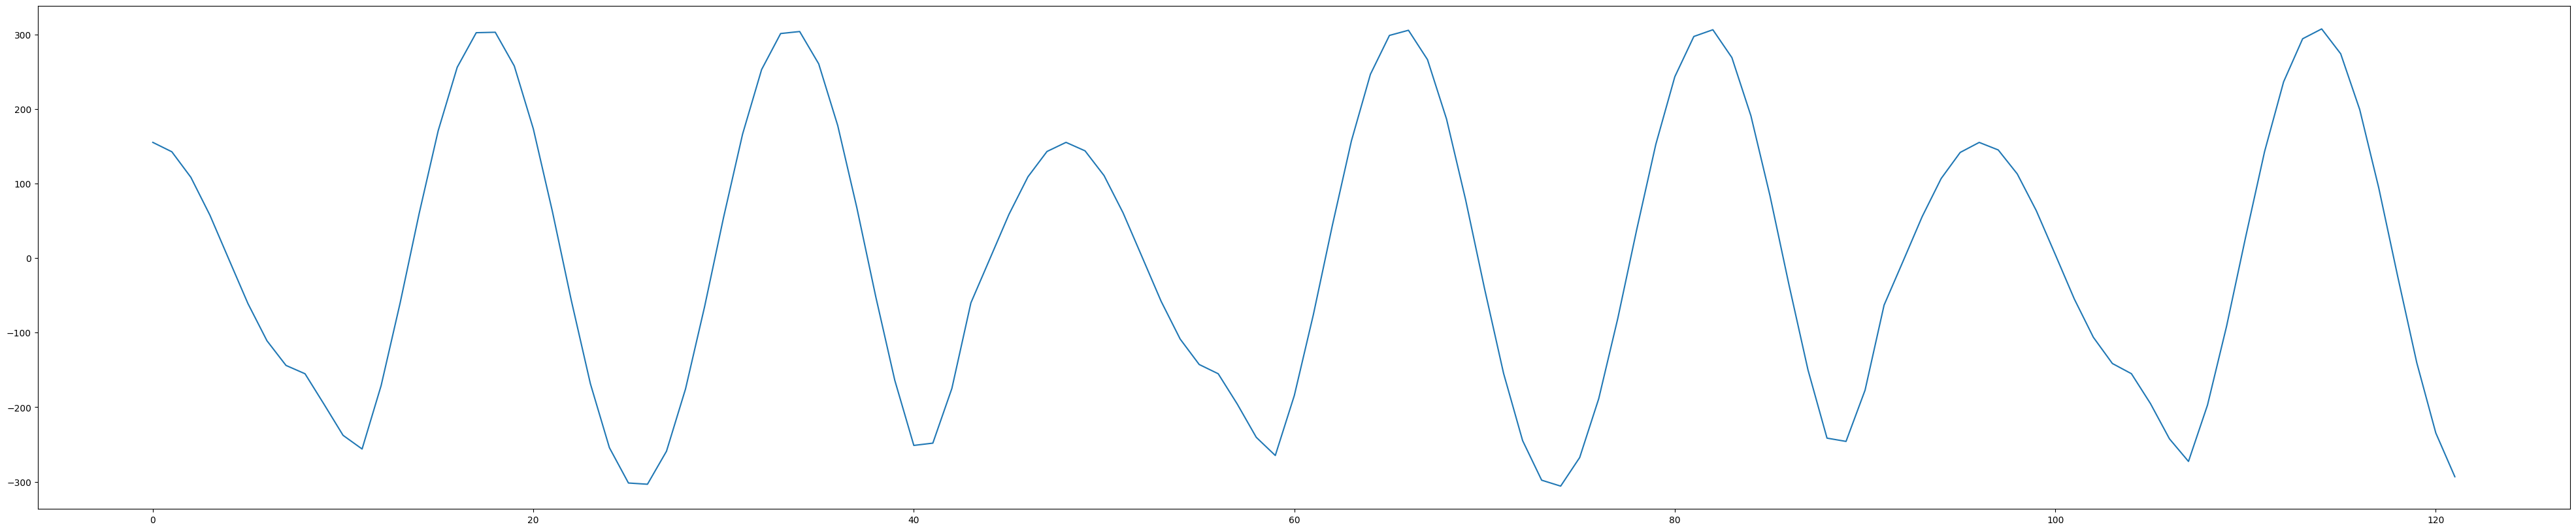

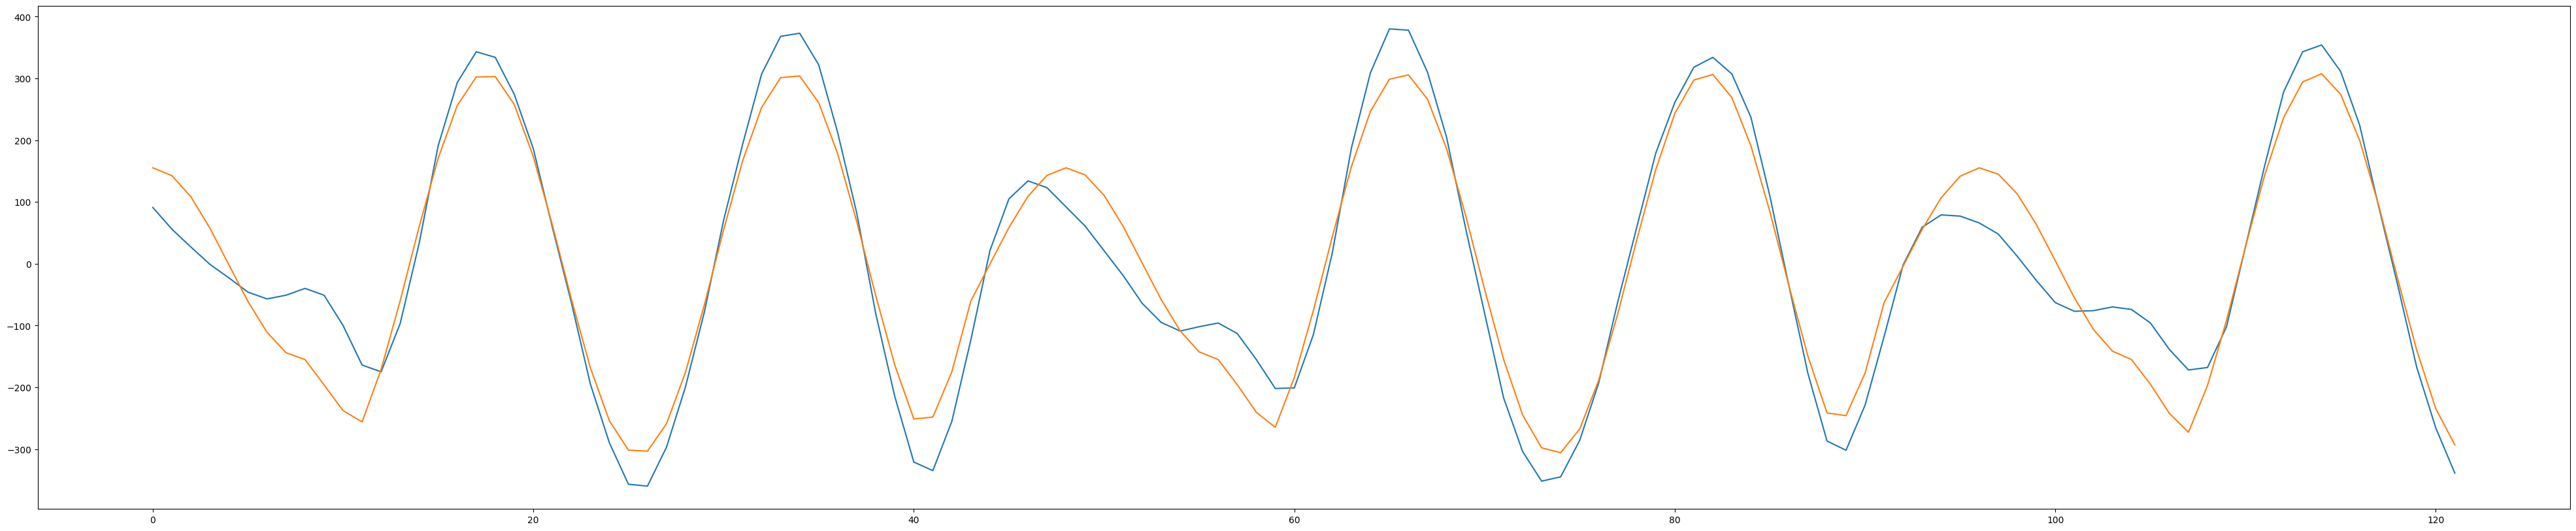

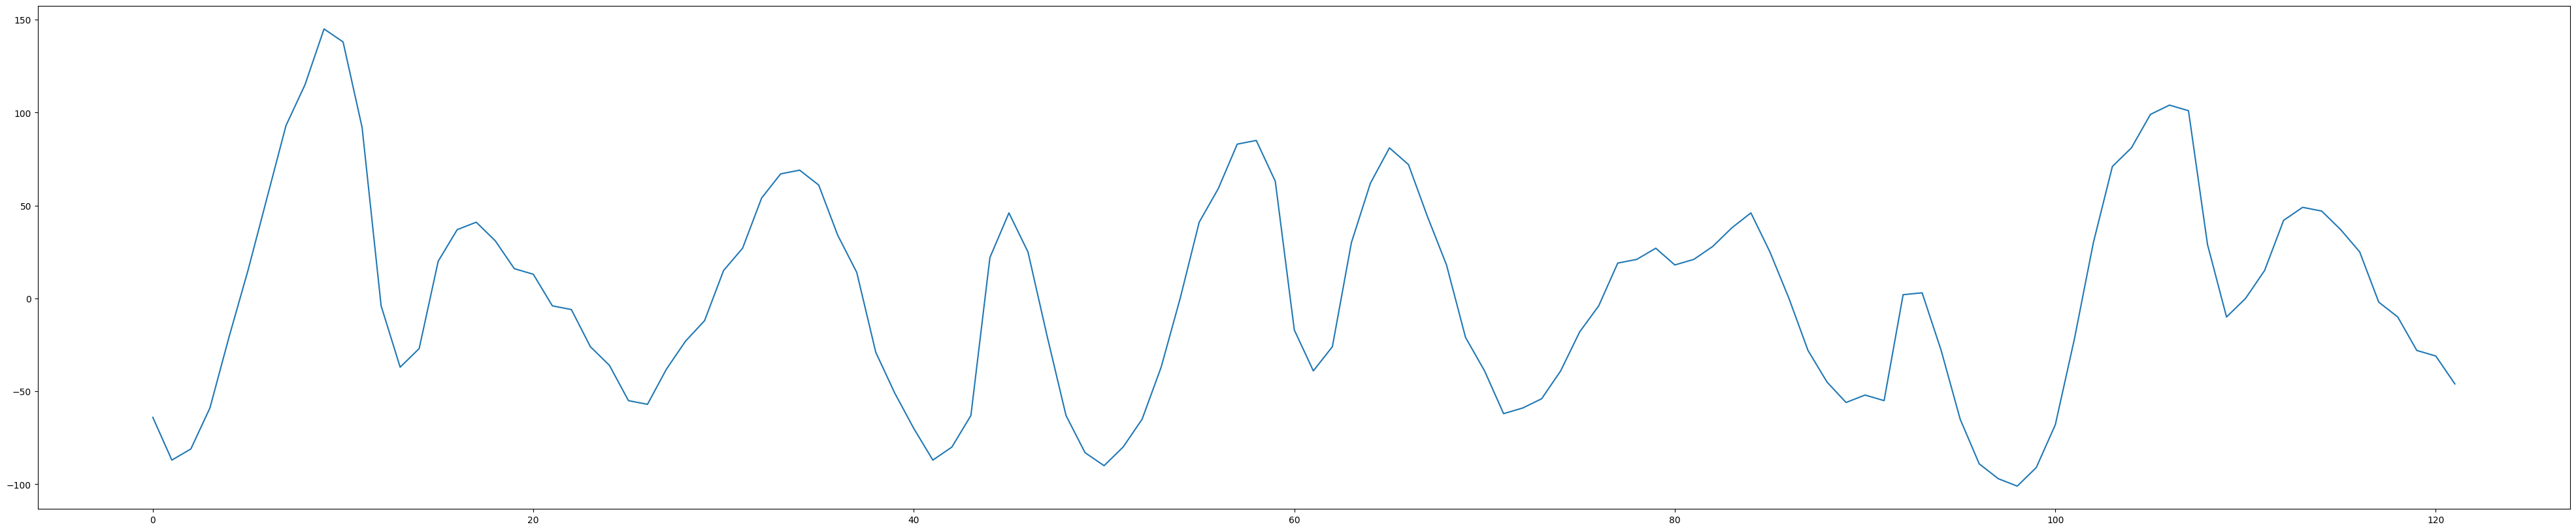

In [99]:
sine1 = predictive_coding.sine_predictor(data['q'], data['ant'])
sine2 = predictive_coding.sine_predictor_wf(data['q'], data['ant'], sine1['freq'])


predicted_vals = predictive_coding.mix_clean(sine1, sine2, data['ant'])
prediction_err = predictive_coding.diff(data_q, predicted_vals)

print_stats(prediction_err, 'Predictive')
print_stats(delta_encoding.encode(prediction_err), 'Predictive Delta')
print_stats(delta_encoding.encode(delta_encoding.encode(prediction_err)), 'Predictive DeltaDelta')

_, ant2data = split_data.split_by_ant(data['q'], data['ant'])

plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
# plt.plot(data['q'])
#plt.plot(predictive_coding.mix_clean(sine1, sine2, data['ant']))
plt.plot(predictive_coding.generate_sine(sine1, split_data.time_len(data_ant))[200:322])
plt.plot(predictive_coding.generate_sine(sine2, split_data.time_len(data_ant))[200:322])

plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
# plt.plot(data['q'])
#plt.plot(predictive_coding.mix_clean(sine1, sine2, data['ant']))
plt.plot(predicted_vals[200:322])


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data['q'][200:322])
#plt.plot(predictive_coding.mix_clean(sine1, sine2, data['ant']))
plt.plot(predicted_vals[200:322])


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(prediction_err[200:322])



## Predictive

Standard Deviation: 98.71
RANGE: [-377,367]
Entropy: 5.480301606008045
16b_int: 9984 BITS
Variable length quantity: 6992 BITS
Rice Golomb Coding: 13341 BITS


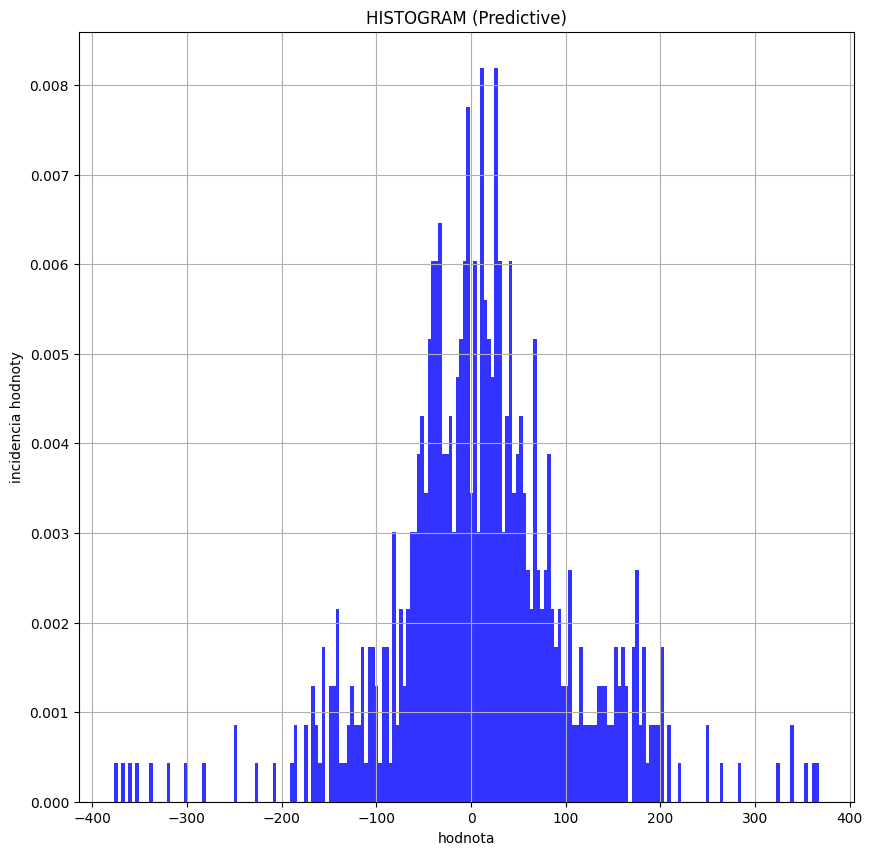

average std dev: 218.76500000000001
average entropy: 6.1775520356654425
average range: 1148.8


In [100]:
data = basicPredictive.compress(data_i, data_ant)
print_stats(data, 'Predictive')


sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = np.append(basicPredictive.compress(data_i, data_ant), basicPredictive.compress(data_q, data_ant))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}') 

## Predictive + delta

Standard Deviation: 98.71
RANGE: [-377,367]
Entropy: 5.480301606008045
16b_int: 9984 BITS
Variable length quantity: 6992 BITS
Rice Golomb Coding: 13341 BITS


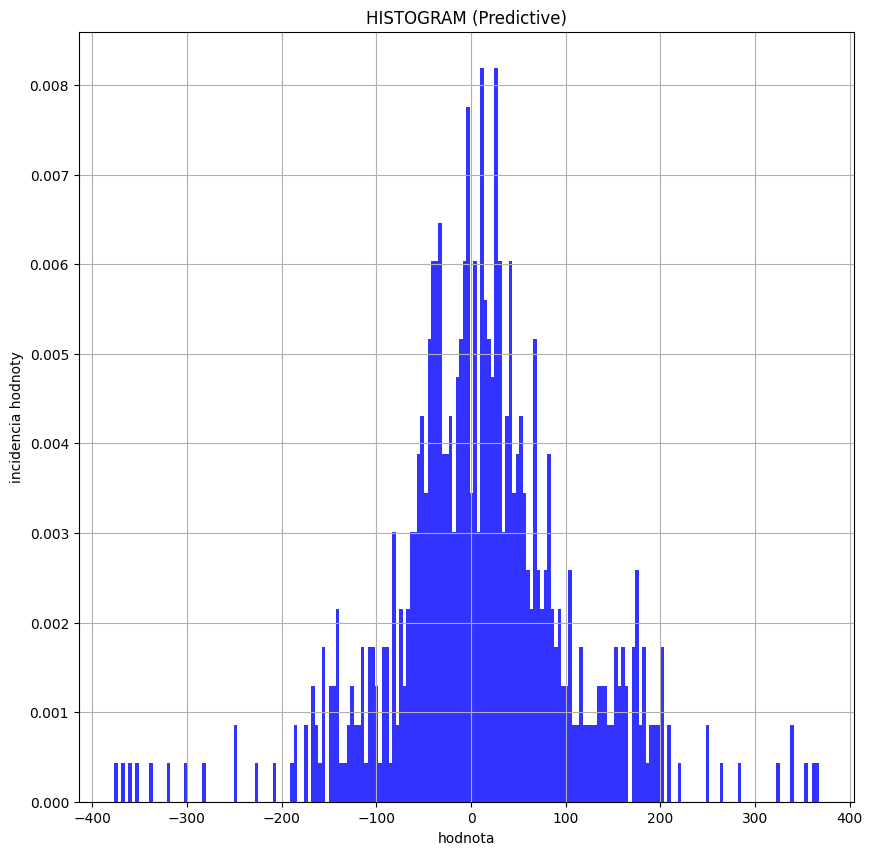

average std dev: 94.582
average entropy: 5.603905347797171
average range: 764.2


In [101]:
data = basicPredictive.compress(data_i, data_ant)
print_stats(data, 'Predictive')


sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(np.append(basicPredictive.compress(data_i, data_ant), basicPredictive.compress(data_q, data_ant)))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}') 

## Predictive + delta delta

Standard Deviation: 98.71
RANGE: [-377,367]
Entropy: 5.480301606008045
16b_int: 9984 BITS
Variable length quantity: 6992 BITS
Rice Golomb Coding: 13341 BITS


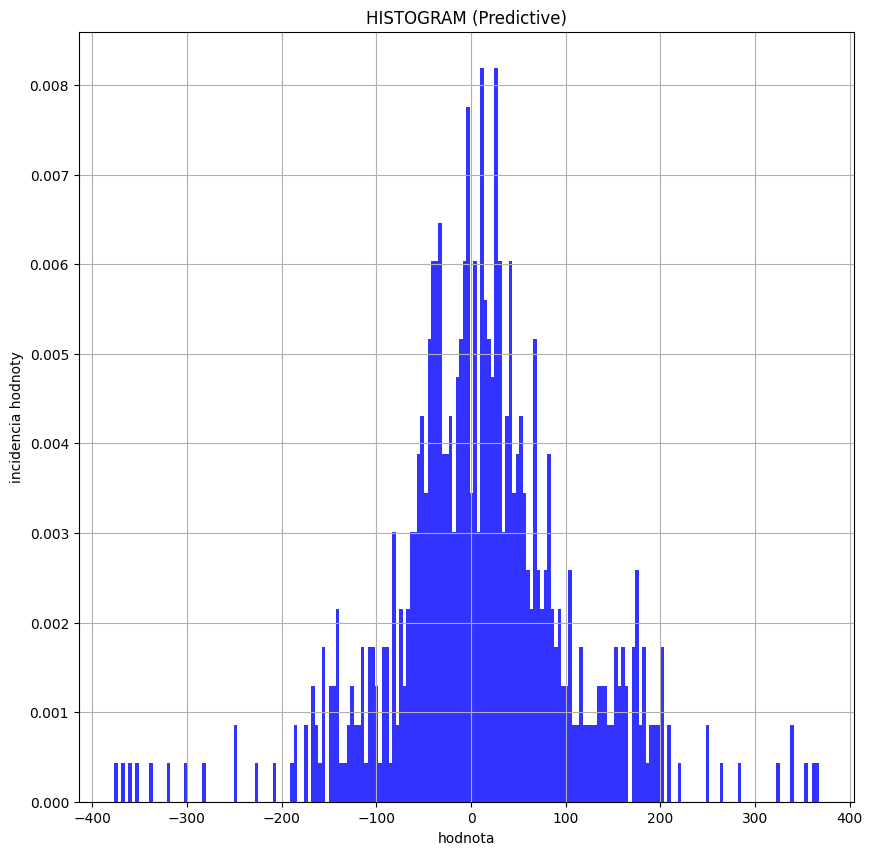

average std dev: 67.55799999999999
average entropy: 5.085598501006806
average range: 918.2


In [102]:
data = basicPredictive.compress(data_i, data_ant)
print_stats(data, 'Predictive')


sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(delta_encoding.encode(np.append(basicPredictive.compress(data_i, data_ant), basicPredictive.compress(data_q, data_ant))))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}') 

## Predictive with correction (adaptive)

Standard Deviation: 34.25
RANGE: [-200,277]
Entropy: 4.336715616230776
16b_int: 9984 BITS
Variable length quantity: 5232 BITS
Rice Golomb Coding: 5248 BITS


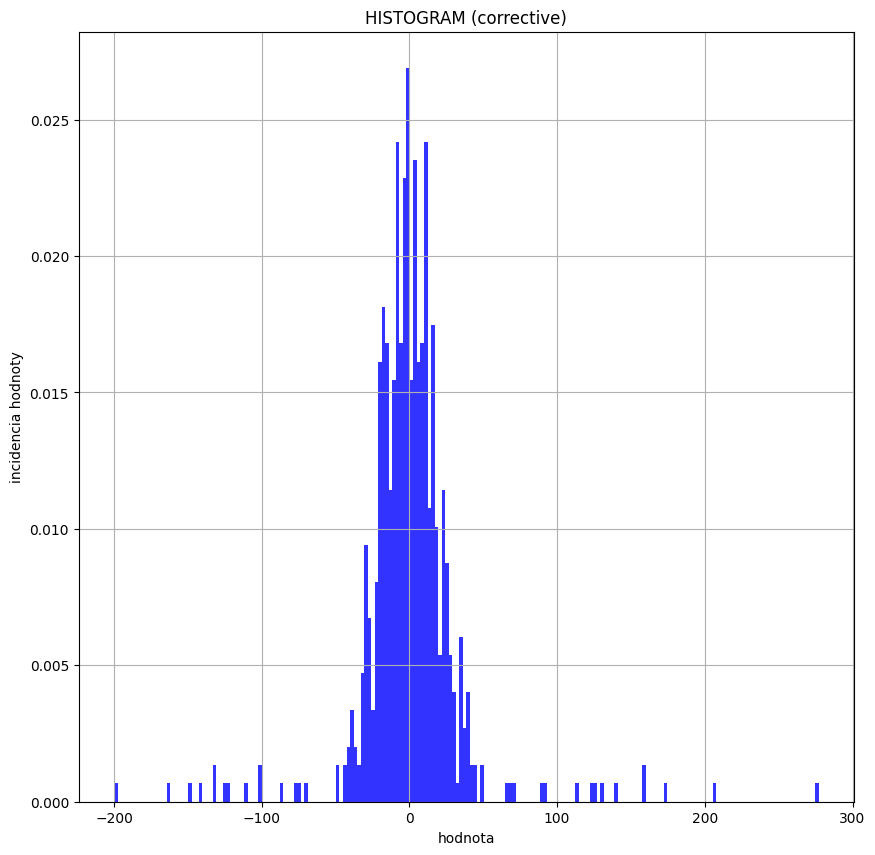

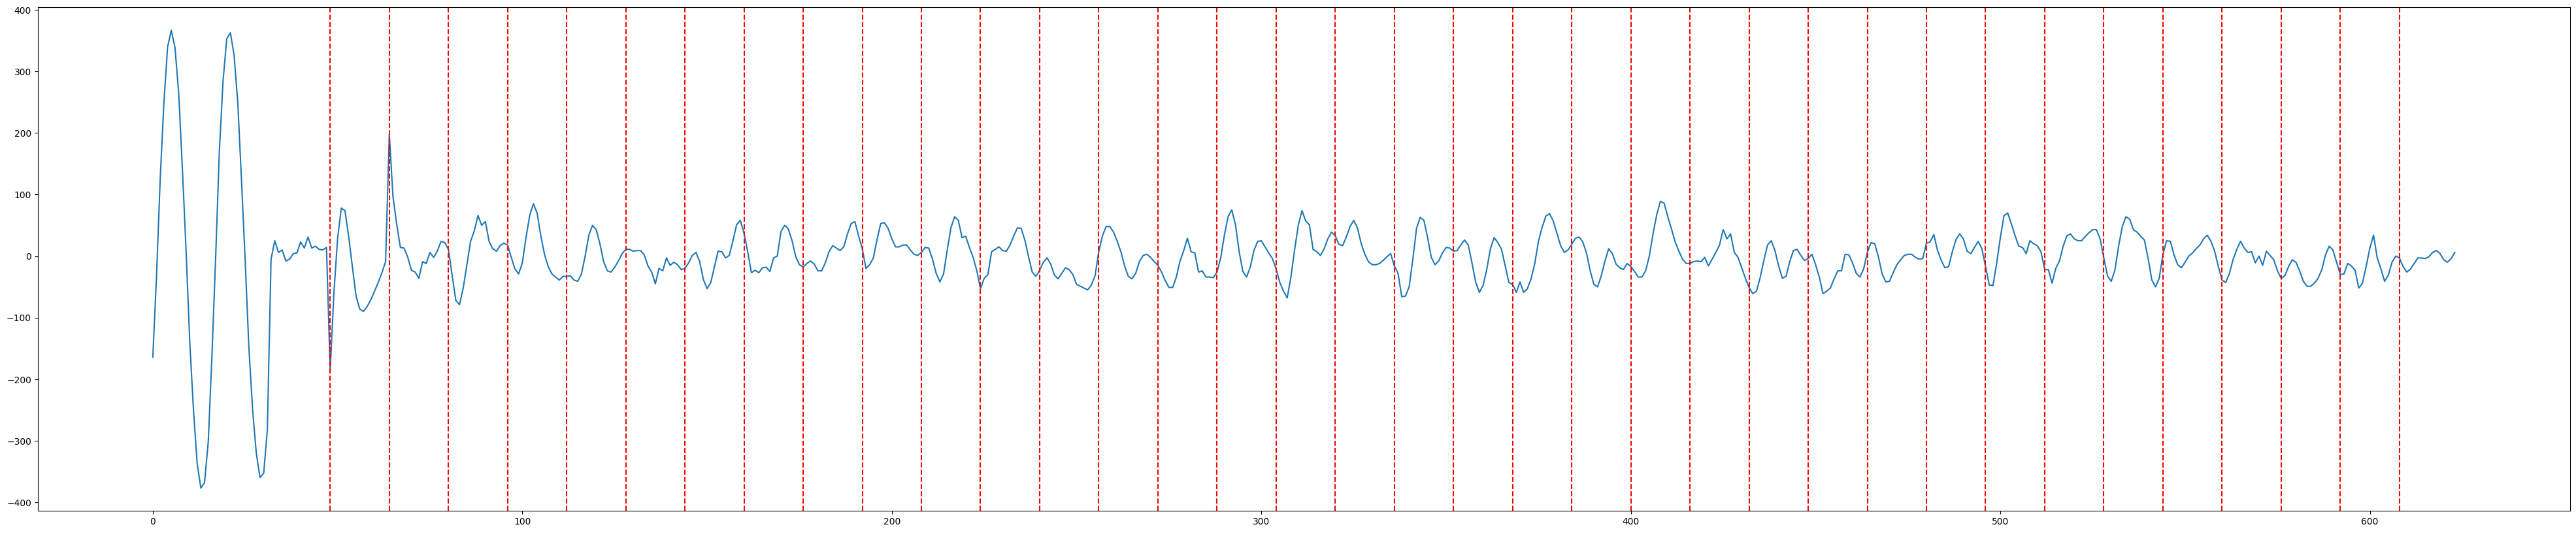

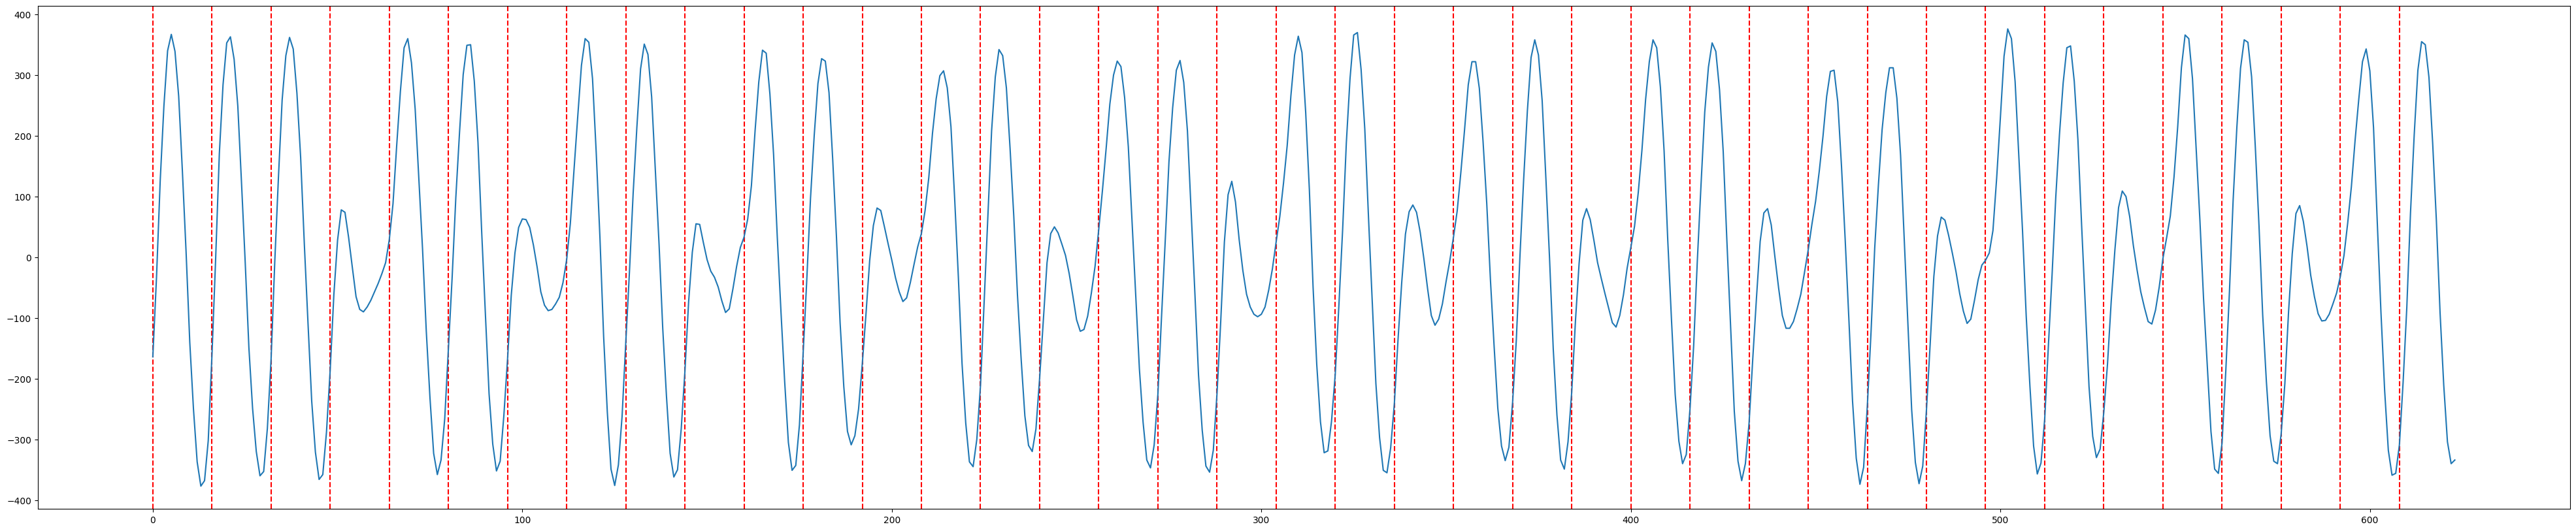

In [103]:
data = basicPredictive.compressCorrective(data_i, data_ant)

print_stats(delta_encoding.encode(data), 'corrective')


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data)


for i in range(48, len(data), 16):
    plt.axvline(x=i, color='r', linestyle='--')

plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
for i in range(0, len(data), 16):
    plt.axvline(x=i, color='r', linestyle='--')
plt.plot(data_i)



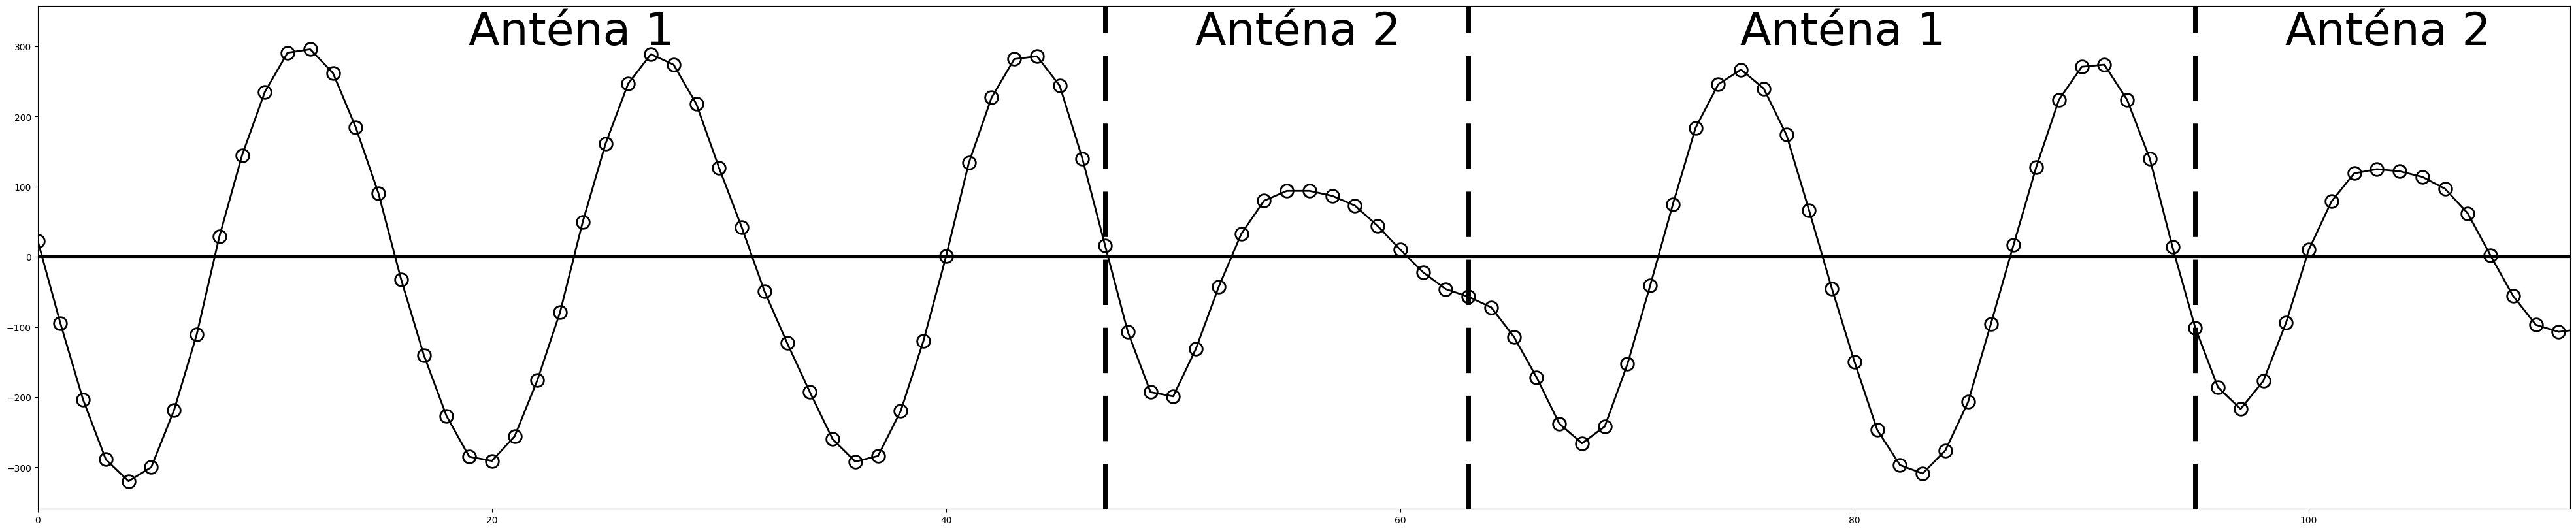

In [157]:
data_file = zipfile.ZipFile('./data/data.zip', 'r')
data = json.load(data_file.open('1661426400[7]-ant121-skifiloc-ang170-iq.json', 'r'))

data_i = np.array(data['i'])
data_q = np.array(data['q'])
data_ant = np.array(data['ant'])

plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data_i, 'k-', linewidth=2)

plt.scatter(range(len(data_i[:112])), data_i[:112], color='k', facecolors='white', s=200, linewidths=2)

plt.xlim(0, len(data_i[:112]) - 0.5)
plt.axhline(y=0, color='black', alpha=1, linewidth=3)
plt.axvline(x=47, linestyle='dashed', color='k', alpha=1, dashes=(10, 5), linewidth=5)
plt.axvline(x=47+16, linestyle='dashed', color='k', alpha=1, dashes=(10, 5), linewidth=5)
plt.axvline(x=47+16+32, linestyle='dashed', color='k', alpha=1, dashes=(10, 5), linewidth=5)


center_x = (47) / 2
center_y = 290

# Add text above the centered position
plt.text(center_x, center_y, 'Anténa 1', ha='center', va='bottom', color='black', fontsize=50)

center_x = (47 + 64) / 2
center_y = 290

# Add text above the centered position
plt.text(center_x, center_y, 'Anténa 2', ha='center', va='bottom', color='black', fontsize=50)

center_x = (63 + 64 + 32) / 2
center_y = 290

# Add text above the centered position
plt.text(center_x, center_y, 'Anténa 1', ha='center', va='bottom', color='black', fontsize=50)


center_x = (63 + 64 + 32 + 32 + 16) / 2
center_y = 290

# Add text above the centered position
plt.text(center_x, center_y, 'Anténa 2', ha='center', va='bottom', color='black', fontsize=50)


plt.show()

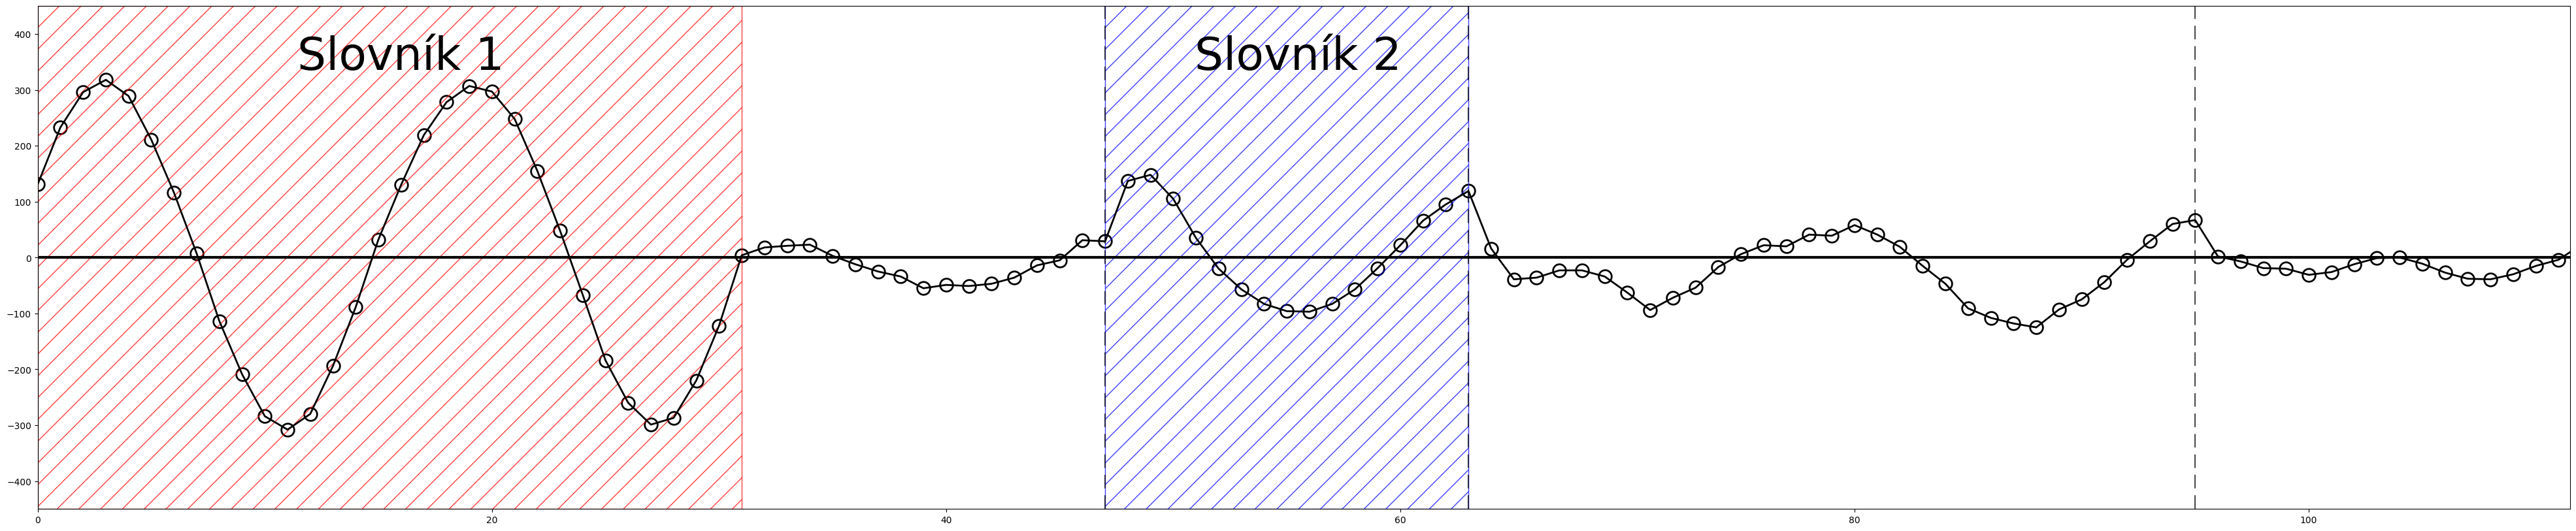

In [153]:
data = basicPredictive.compress(data_i, data_ant)


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data, 'k-', linewidth=2)

plt.scatter(range(len(data[:112])), data[:112], color='k', facecolors='white', s=200, linewidths=2)

plt.xlim(0, len(data_i[:112]) - 0.5)
plt.axhline(y=0, color='black', alpha=1, linewidth=3)
plt.axvline(x=47, linestyle='dashed', color='k', alpha=0.7, dashes=(10, 5))
plt.axvline(x=47+16, linestyle='dashed', color='k', alpha=0.7, dashes=(10, 5))
plt.axvline(x=47+16+32, linestyle='dashed', color='k', alpha=0.7, dashes=(10, 5))


# Define the vertices of the square
vertices = [(0, -450), (31, -450), (31, 450), (0, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='r', alpha=0.75)


# Define the vertices of the square
vertices = [(47, -450), (63, -450), (63, 450), (47, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='b', alpha=0.75)

plt.ylim(-450, 450)  # Set y-axis limits to match the square's y-coordinates


center_x = (32) / 2
center_y = 320

# Add text above the centered position
plt.text(center_x, center_y, 'Slovník 1', ha='center', va='bottom', color='black', fontsize=50)

center_x = (47 + 64) / 2
center_y = 320

# Add text above the centered position
plt.text(center_x, center_y, 'Slovník 2', ha='center', va='bottom', color='black', fontsize=50)




plt.show()



[23, -95, -204, -289, -320, -300, -219, -111, 29, 145, 235, 291, 296, 262, 185, 91, -32, -140, -227, -285, -291, -256, -176, -79, 50, 161, 247, 289, 274, 218, 127, 42, -49, -123, -193, -260, -292, -284, -220, -120, 1, 134, 227, 282, 286, 244, 140, 16, -107, -193, -199, -131, -43, 33, 80, 94, 94, 87, 73, 44, 10, -22, -46, -57, -72, -114, -172, -238, -266, -242, -153, -41, 75, 184, 246, 267, 240, 174, 66, -45, -150, -247, -297, -309, -276, -207, -96, 17, 128, 224, 271, 274, 224, 140, 14, -101, -186, -217, -177, -94, 10, 79, 119, 125, 122, 114, 97, 62, 2, -56, -97, -107, -103, -109, -132, -152, -135, -69, 29, 143, 220, 269, 275, 242, 162, 63, -42, -150, -228, -287, -305, -278, -188, -74, 47, 163, 233, 268, 259, 214, 127, 24, -90, -211, -282, -288, -216, -100, 28, 97, 115, 98, 74, 49, 17, -14, -48, -69, -73, -63, -55, -60, -85, -103, -84, -13, 94, 220, 299, 325, 296, 222, 109, 1, -103, -201, -263, -285, -249, -170, -51, 54, 145, 225, 268, 278, 238, 158, 51, -80, -190, -281, -310, -280, -18

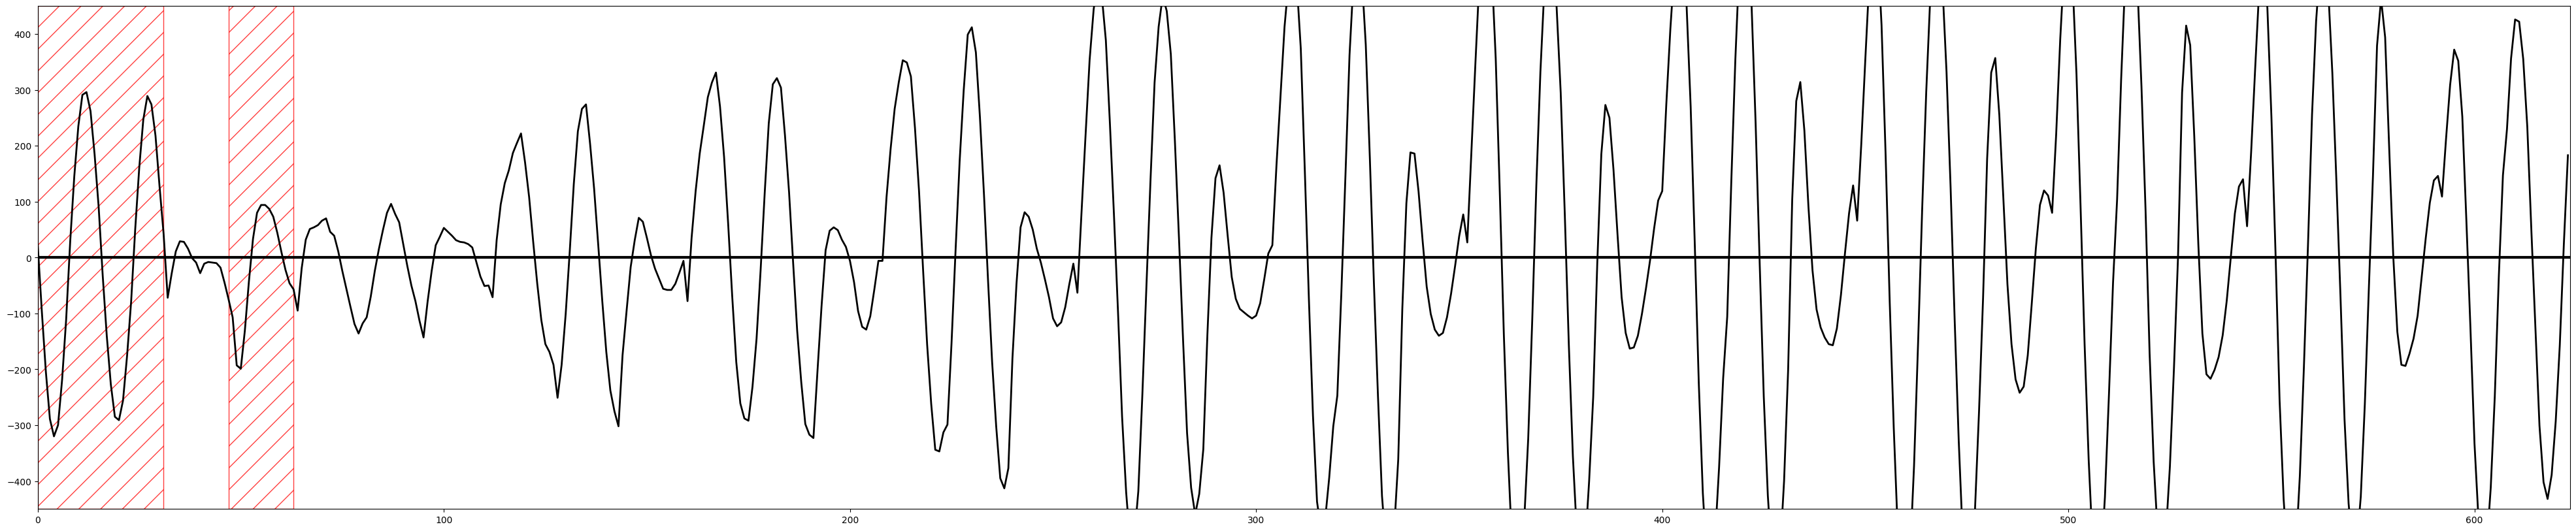

In [160]:
data = basicPredictive.compress(data_i, data_ant)


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data, 'k-', linewidth=2)


plt.xlim(0, len(data_i) - 0.5)
plt.axhline(y=0, color='black', alpha=1, linewidth=3)

# Define the vertices of the square
vertices = [(0, -450), (31, -450), (31, 450), (0, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='r', alpha=0.75)


# Define the vertices of the square
vertices = [(47, -450), (63, -450), (63, 450), (47, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='r', alpha=0.75)

plt.ylim(-450, 450)  # Set y-axis limits to match the square's y-coordinates




plt.show()

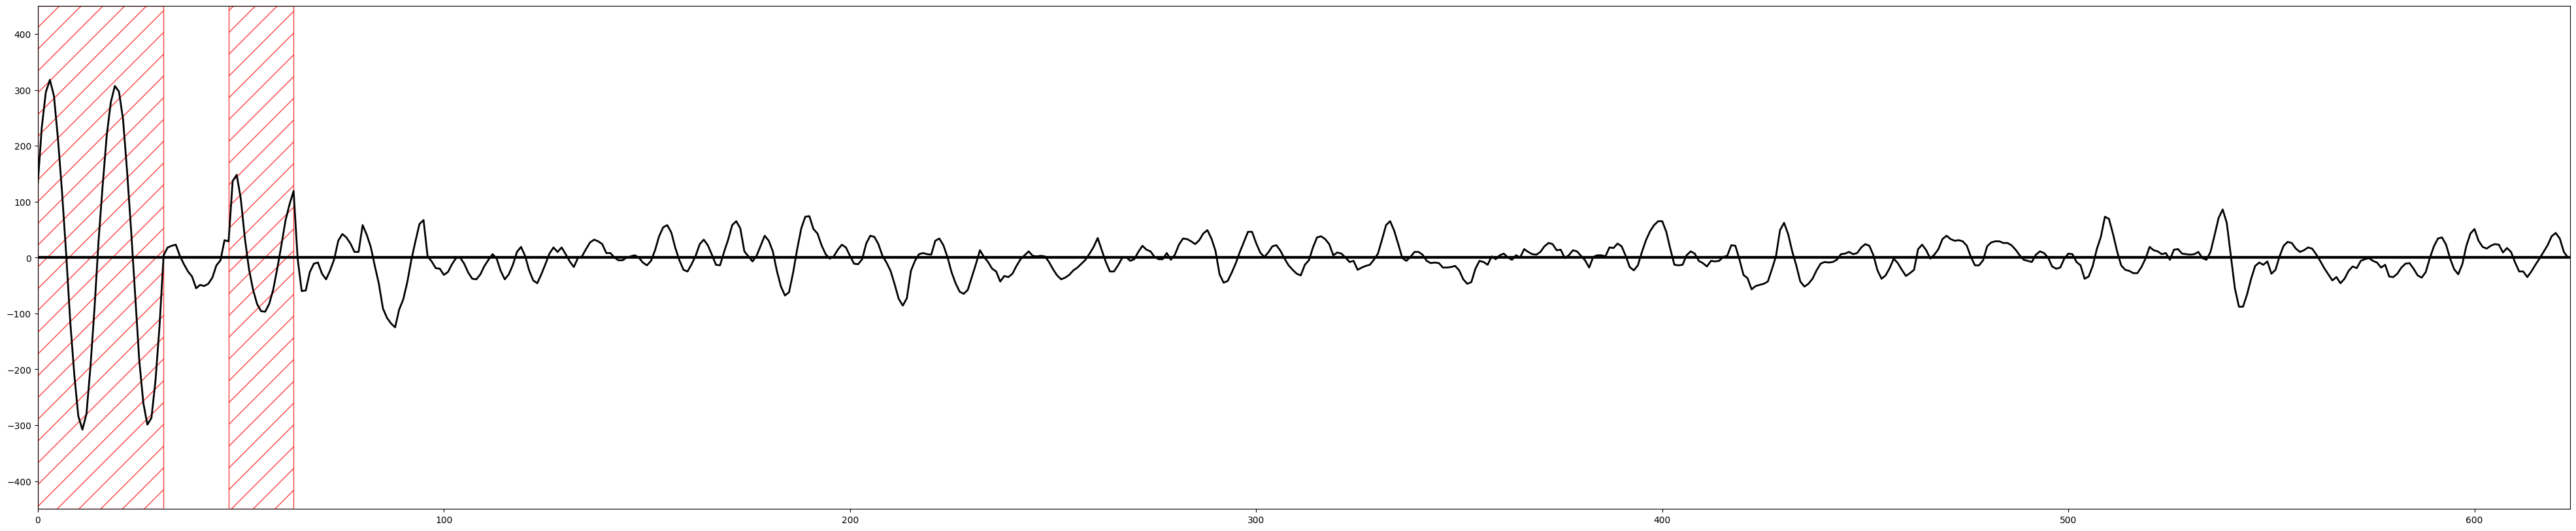

In [152]:
data = basicPredictive.compressCorrective(data_i, data_ant)
print(data)


plt.rcParams["figure.figsize"] = (50,10)
plt.figure()
plt.plot(data, 'k-', linewidth=2)

plt.axhline(y=0, color='black', alpha=1, linewidth=3)

plt.xlim(0, len(data_i) - 0.5)

# Define the vertices of the square
vertices = [(0, -450), (31, -450), (31, 450), (0, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='r', alpha=0.75)


# Define the vertices of the square
vertices = [(47, -450), (63, -450), (63, 450), (47, 450)]

# Unzip the list of vertices into x and y coordinates
x, y = zip(*vertices)

# Fill the square with hatching
plt.fill(x, y, hatch='/', color='none', edgecolor='r', alpha=0.75)

plt.ylim(-450, 450)  # Set y-axis limits to match the square's y-coordinates




plt.show()

## Predictive with correction

In [108]:
sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = np.append(basicPredictive.compressCorrective(data_i, data_ant), basicPredictive.compressCorrective(data_q, data_ant))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}')    


average std dev: 74.615
average entropy: 5.274742681590866
average range: 700.3


## Predictive with correction + delta coding

In [109]:
sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(np.append(basicPredictive.compressCorrective(data_i, data_ant), basicPredictive.compressCorrective(data_q, data_ant)))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}')    

average std dev: 36.784
average entropy: 4.640895664698898
average range: 637.1


## Predictive with correction + delta delta coding

In [110]:
sum_std = 0
sum_ent = 0
sum_range = 0

for idx in range(0, 10):
    data_file = zipfile.ZipFile('./data/data.zip', 'r')
    data = json.load(data_file.open(f'1661426400[{idx}]-ant121-skifiloc-ang170-iq.json', 'r'))
    data_i = np.array(data['i'])
    data_q = np.array(data['q'])
    data_ant = np.array(data['ant'])
    result = delta_encoding.encode(delta_encoding.encode(np.append(basicPredictive.compressCorrective(data_i, data_ant), basicPredictive.compressCorrective(data_q, data_ant))))

    sum_std = sum_std + get_std_dev(result)
    sum_ent = sum_ent + get_entropy(result)
    sum_range = sum_range + get_range(result)
    
print(f'average std dev: {sum_std/10}')    
print(f'average entropy: {sum_ent/10}')    
print(f'average range: {sum_range/10}')    

average std dev: 35.004999999999995
average entropy: 4.386490876759252
average range: 745.8


In [111]:
data_file.close()